In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pylab as pl
from IPython import display
from lib import util
from copy import deepcopy
%matplotlib inline
from lib import frame_util as futil

In [ ]:

vidDict = futil.AddVxAx("res/101_trajectories/trajectories-0750am-0805am.txt", "res/101_trajectories/aug_trajectories-0750am-0805am.txt")

print(len(vidDict))


In [ ]:
util.dumpJSONDict("testDump.json", vidDict)

In [ ]:
util.dumpJSONDict("frameDict1.json", frameDict)

In [2]:
vidDict = futil.LoadDictFromTxt("res/101_trajectories/aug_trajectories-0750am-0805am.txt", 'vid')

In [2]:
frameDict = futil.LoadDictFromTxt("res/101_trajectories/aug_trajectories-0750am-0805am.txt", 'frame')

In [ ]:
vidDict = util.loadJSONDict("testDump.json")


In [ ]:
#[VID, FID, totalF, globaltime, localX, localY, globalX, globalY, \
#vehicleLength, vehicleWidth, vehicleClass, vVelocity, vAccel, laneID\
#precedingVID, followingVID, spacingFt, headwayFt]


KeyboardInterrupt


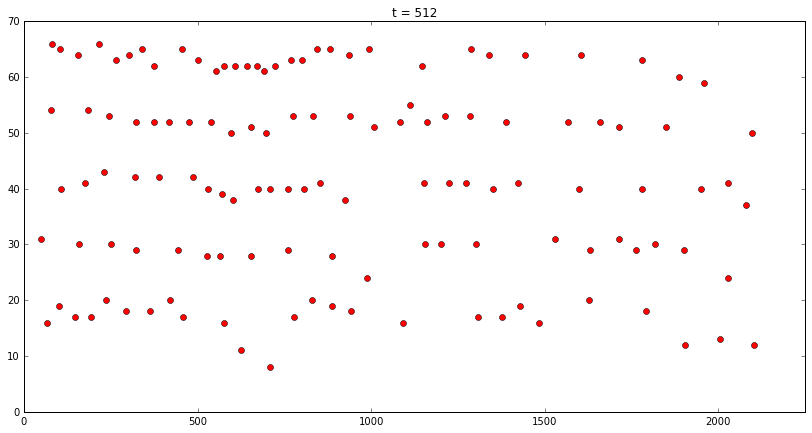

In [3]:
#With a loaded frameDict, animates frames.
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
plt.figure(1)

for i in range(int(len(frameDict)/2)):
    curFrame = frameDict[100 + i*5]
    #print(len(curFrame))
    x = np.array([0]*len(curFrame))
    y = np.array([0]*len(curFrame))
    #print(len(x))
    entryCounter = 0
    for entry in curFrame:
        x[entryCounter] = float(curFrame[entry][4])
        y[entryCounter] = float(curFrame[entry][5])
        entryCounter += 1
    
    plt.plot(y,70 - x, 'ro')
    plt.title("t = " + str(i))
    plt.axis([0, 2250, 0, 70])
    display.clear_output(wait=True)
    display.display(pl.gcf())
    
    plt.show()


    